# Data Dictionary: 

-CUST_ID: Credit card holder ID \
-BALANCE: Monthly average balance (based on daily balance averages)\
-BALANCE_FREQUENCY: Ratio of last 12 months with balance\
-PURCHASES: Total purchase amount spent during last 12 months\
-ONEOFF_PURCHASES: Total amount of one-off purchases\
-INSTALLMENTS_PURCHASES: Total amount of installment purchases\
-CASH_ADVANCE: Total cash-advance amount\
-PURCHASES_ FREQUENCY: Frequency of purchases (Percent of months with at least one purchase)\
-ONEOFF_PURCHASES_FREQUENCY: Frequency of one-off-purchases PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment -purchases\
-CASH_ADVANCE_ FREQUENCY: Cash-Advance frequency\
-AVERAGE_PURCHASE_TRX: Average amount per purchase transaction\
-CASH_ADVANCE_TRX: Average amount per cash-advance transaction\
-PURCHASES_TRX: Average amount per purchase transaction\
-CREDIT_LIMIT: Credit limit\
-PAYMENTS: Total payments (due amount paid by the customer to decrease their statement balance) in the period\
-MINIMUM_PAYMENTS: Total minimum payments due in the period.\
-PRC_FULL_PAYMEN: Percentage of months with full payment of the due statement balance\
-TENURE: Number of months as a customer

# Importo librerias

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
#Machine learning
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_score
import time
%matplotlib inline

In [6]:
df = pd.read_csv(r'C:\Users\mur_9\OneDrive\Documentos\Code\clusterai\cv\Approval Credit\dataset_credit.csv',)

In [7]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
df.drop('CUST_ID',axis=1,inplace=True)

In [9]:
shapev=df.shape
shapev

(8950, 17)

In [10]:
#Reviso los NaN
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
#Como el peso total de los NaN es bajo con respecto a la muestra los saco
df.dropna(inplace=True)
df.isnull().sum()
print(f'Me quedan un total de {df.shape[0]} filas, se eliminaron {shapev[0]-df.shape[0]}.\
\n Representando un total de {((shapev[0]-df.shape[0])/shapev[0])*100} del df.' )

Me quedan un total de 8636 filas, se eliminaron 314.
 Representando un total de 3.5083798882681565 del df.


In [12]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [13]:
df.columns.values

array(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'], dtype=object)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT

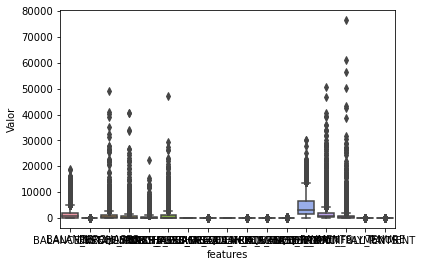

In [39]:
#Veo como estan mis variables sin normalizar.
sns.boxplot(data = pd.DataFrame(df))
plt.xlabel("features")
plt.ylabel("Valor")
plt.show()

## Visualizaciones
Uso boxplots/heatmap para ver como estoy parado con las variables y sus valores.

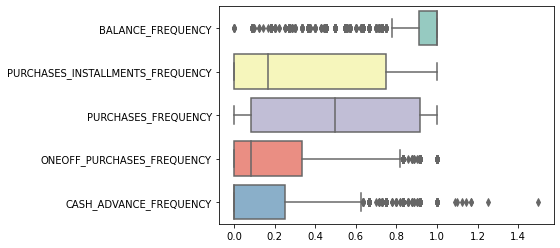

In [16]:
#Veo como se comportan las variables/features relacionadas a los campos de frecuencia.
ax1 = df.loc[:,['BALANCE_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY']]
ax = sns.boxplot(data=ax1, orient="h", palette="Set3")

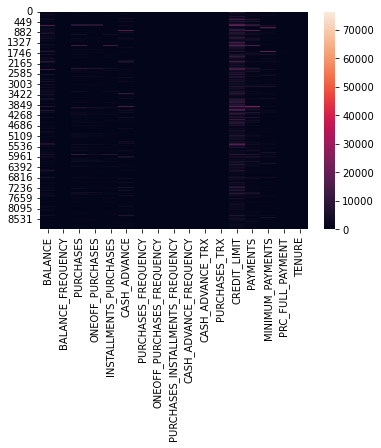

In [17]:
sns.heatmap(df)
plt.show()

## Normalizo la informacion
llevo todo a las misma escala, mayormente se debe a que la dispersion entre variables es muy alta ( estoy trabajando con valores absolutos y frecuencias).

In [18]:
scaler = preprocessing.StandardScaler().fit(df)
scaler

StandardScaler()

In [19]:
xscal = scaler.transform(df)
xscal

array([[-0.74462486, -0.37004679, -0.42918384, ..., -0.30550763,
        -0.53772694,  0.35518066],
       [ 0.76415211,  0.06767893, -0.47320819, ...,  0.08768873,
         0.21238001,  0.35518066],
       [ 0.42660239,  0.50540465, -0.11641251, ..., -0.09990611,
        -0.53772694,  0.35518066],
       ...,
       [-0.75297728, -0.29709491, -0.40657175, ..., -0.32957217,
         0.30614422, -4.22180042],
       [-0.75772142, -0.29709491, -0.47320819, ..., -0.34081076,
         0.30614422, -4.22180042],
       [-0.58627829, -1.09958965,  0.03129519, ..., -0.32709767,
        -0.53772694, -4.22180042]])

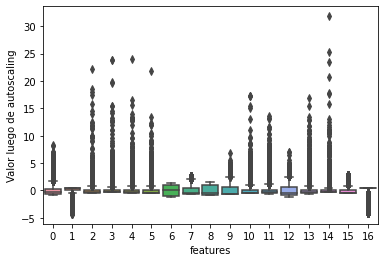

In [20]:
#Veo como estan mis variables normalizadas.
sns.boxplot(data = pd.DataFrame(xscal))
plt.xlabel("features")
plt.ylabel("Valor luego de autoscaling")
plt.show()

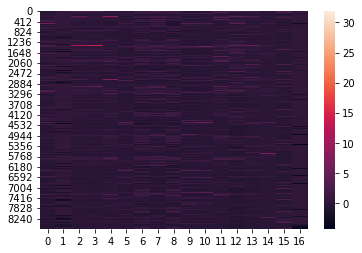

In [21]:
sns.heatmap(xscal)
plt.show()

In [22]:
cluster_df=df[['PURCHASES','ONEOFF_PURCHASES','PURCHASES_TRX','ONEOFF_PURCHASES_FREQUENCY','INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CREDIT_LIMIT','PAYMENTS','CASH_ADVANCE_FREQUENCY']]

## KNN r
Uso KNN para clusterizar/agrupar segun segmentos.

In [23]:
#Genero los valores que necesito.
variacion = []
I = range(1,8)
for i in I:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(xscal)
    variacion.append(kmeans.inertia_)
centers = kmeans.cluster_centers_
centers

array([[-3.24705625e-03,  3.92769954e-01, -3.47659501e-01,
        -2.27513487e-01, -4.03758613e-01, -1.09445028e-01,
        -8.22208552e-01, -3.43960902e-01, -7.61224344e-01,
         8.10102135e-02, -4.43205284e-02, -4.69474534e-01,
        -3.08386119e-01, -2.55647476e-01, -1.37175114e-02,
        -4.64634326e-01,  2.65532986e-01],
       [-3.75849197e-01,  3.23719089e-01, -4.56519740e-02,
        -2.35783505e-01,  3.25251600e-01, -3.71469472e-01,
         9.75250976e-01, -3.57359613e-01,  1.16969119e+00,
        -4.83999151e-01, -3.66276973e-01,  1.67486430e-01,
        -2.85934409e-01, -2.36431885e-01, -1.07104600e-02,
         2.81848076e-01,  2.52807854e-01],
       [ 1.41627829e+00,  3.88853519e-01,  6.93447531e+00,
         6.08410570e+00,  5.21119009e+00,  2.22098133e-02,
         1.07041155e+00,  1.85193169e+00,  1.02947560e+00,
        -2.63985200e-01, -5.93602050e-02,  4.62531056e+00,
         2.14707871e+00,  4.78311785e+00,  1.07320528e+00,
         7.85191699e-01,  3.2

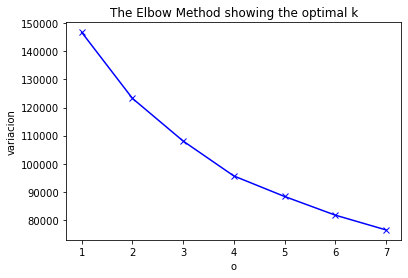

se puede apreciar un codo en k=2


In [24]:
#Reviso como se comporta el codo
plt.plot(I, variacion, 'bx-')
plt.xlabel('o')
plt.ylabel('variacion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print('se puede apreciar un codo en k=2')

In [25]:
#Calculo el silhouette score para tenes una nocion de como se comporta el modelo con KNNr
resultados = pd.DataFrame(columns=['Cluster','silscore'])
kmeans = KMeans(n_clusters=2).fit(xscal)
sil_score = silhouette_score(xscal,kmeans.labels_,metric='euclidean')
resultados = resultados.append({'Cluster':'Kmeans',
                                'silscore':sil_score},ignore_index=True)
resultados
                    

,Cluster,silscore
0,Kmeans,0.208923


In [26]:
kmeans.labels_

array([0, 0, 1, ..., 0, 0, 0])

C:\Users\mur_9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


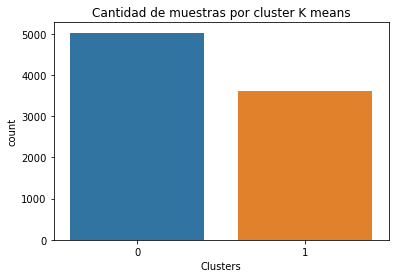

In [27]:
#Veo como se componen los grupos
sns.countplot(kmeans.labels_)
plt.title("Cantidad de muestras por cluster K means")
plt.xlabel("Clusters")
plt.show()

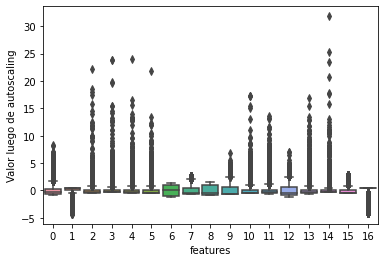

In [28]:
sns.boxplot(data = pd.DataFrame(xscal))
plt.xlabel("features")
plt.ylabel("Valor luego de autoscaling")
plt.show()

## PCA
Busco reducir las dimensiones del problema porque tengo 17 variables dentro de las cuales tengo algunas que estan altamente relacionadas con otras, es decir que me estan diciendo lo mismo (casi).

In [29]:
var = {}
pca = PCA()
pca.fit(xscal)
 
for i in range(len(pd.DataFrame(xscal).columns.values)):
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    d = np.argmax(cumsum >= 0.85) + 1
    var [i] = pca.explained_variance_ratio_[i]*100

pd.DataFrame(var.items(),columns= ['Dimension','Peso %'])


,Dimension,Peso %
0,0,27.231177
1,1,20.374308
2,2,8.918334
3,3,7.573609
4,4,6.276618
5,5,5.712786
6,6,4.916188
7,7,4.210734
8,8,3.681697
9,9,3.081508


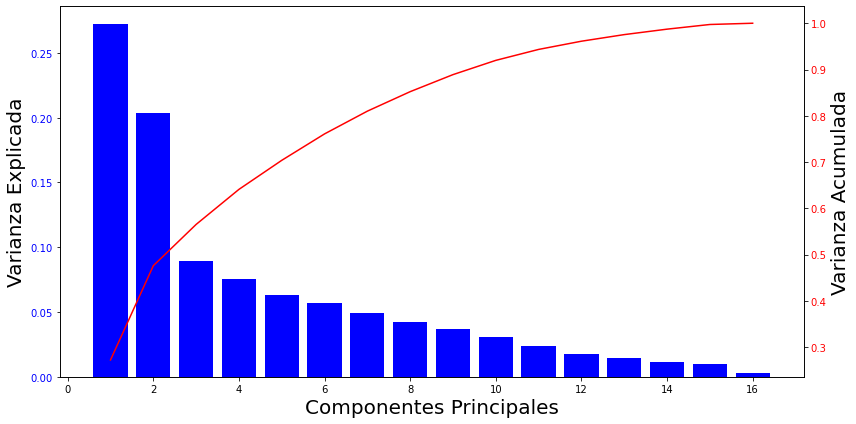

In [30]:
#pca = PCA().fit(xscal)
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlim(0,16,1)
#plt.grid()
#plt.xlabel('Number of components')
#plt.ylabel('Cumulative explained variance')
#%time
n_comps = 16
components = range(1,n_comps + 1)
pca = PCA(n_components=n_comps)
pca.fit(xscal)
xpca = pca.transform(xscal)
eigenvalues = pca.explained_variance_ratio_
eigenvalues_acum = pca.explained_variance_ratio_.cumsum() 
# Definimos la cantidad de componentes


# Graficamos
# Eje Izquierdo
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_xlabel('Componentes Principales',fontsize=20)
ax1.set_ylabel('Varianza Explicada', color='k',fontsize=20)
ax1.bar(components, eigenvalues, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Eje derecho
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Varianza Acumulada', color='k',fontsize=20) 
ax2.plot(components, eigenvalues_acum, color='red') 
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [31]:
n_comps= d
components = range(1,n_comps + 1)
pca = PCA(n_components=n_comps)
pca.fit(xscal)
xpca = pca.transform(xscal)

In [32]:
kmean = KMeans(n_clusters=2)
kmean.fit(xpca)
labels=kmean.labels_
labels=labels.tolist()
labels=pd.Series(data=labels,index=range(len(labels)))
labels_x=list()
for i in range(d):
    labels_x.append(labels[labels.values==i])
sil_score = silhouette_score(xpca,labels)
resultados = resultados.append({'Cluster': 'PCA+Kmeans','silscore':sil_score},ignore_index=True)
resultados


,Cluster,silscore
0,Kmeans,0.208923
1,PCA+Kmeans,0.237919


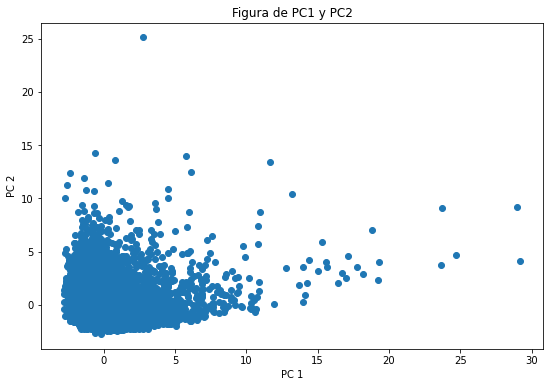

In [33]:
plt.figure(figsize=(9,6))
plt.scatter(xpca[:,0],xpca[:,1])    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Figura de PC1 y PC2')
plt.show()


In [34]:
print(f'Se puede apreciar que gracias a reducir las dimensiones en {17-d} y normalizar con stdscaler, mejoro \nel Clustering ya que {resultados.Cluster[1]} tiene un silhouette score mayor a {resultados.Cluster[0]} indicando mas overlap en los grupos.')

Se puede apreciar que gracias a reducir las dimensiones en 9 y normalizar con stdscaler, mejoro 
el Clustering ya que PCA+Kmeans tiene un silhouette score mayor a Kmeans indicando mas overlap en los grupos.


Text(0, 0.5, 'PC 2')

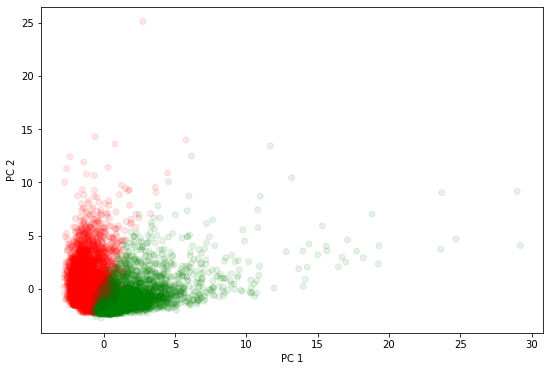

In [35]:
#Grafico los dos grupos con PCA + KNNr (C0: OK ;C1 : NO OK)
color_map={0:'g',1:'r'}
label_color=[color_map[l] for l in labels]
plt.figure(figsize=(9,6))
plt.scatter(xpca[:,0],xpca[:,1],c=label_color,cmap='Diverging',alpha=0.1)
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [36]:
C1 = cluster_df.iloc[labels_x[1].index,:].describe()
C1

,PURCHASES,ONEOFF_PURCHASES,PURCHASES_TRX,ONEOFF_PURCHASES_FREQUENCY,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CREDIT_LIMIT,PAYMENTS,CASH_ADVANCE_FREQUENCY
count,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000
mean,288.679612,207.886692,3.561758,0.092378,81.082338,0.204605,0.110320,4100.110427,1489.022630,0.195389
std,484.795359,441.886115,4.981727,0.150909,195.863127,0.238420,0.198367,3317.845796,2487.429744,0.222111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,349.385349,0.000000
50%,88.985000,0.000000,1.000000,0.000000,0.000000,0.083333,0.000000,3000.000000,705.204074,0.125000
75%,375.022500,216.955000,6.000000,0.125000,73.830000,0.333333,0.166667,6000.000000,1583.451883,0.333333
max,5197.220000,4900.000000,48.000000,1.000000,3000.000000,1.000000,1.000000,23000.000000,39048.597620,1.500000


In [37]:
C0 = cluster_df.iloc[labels_x[0].index,:].describe()
C0

,PURCHASES,ONEOFF_PURCHASES,PURCHASES_TRX,ONEOFF_PURCHASES_FREQUENCY,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CREDIT_LIMIT,PAYMENTS,CASH_ADVANCE_FREQUENCY
count,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000
mean,2063.961367,1164.532715,31.203404,0.365941,899.770307,0.906750,0.733202,5116.914133,2200.951600,0.056151
std,3023.684466,2454.812459,32.341754,0.375608,1257.512766,0.139414,0.315323,4018.288189,3374.385921,0.131316
min,8.400000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,300.000000,18.496532,0.000000
25%,549.022500,0.000000,12.000000,0.000000,256.500000,0.833333,0.583333,2000.000000,574.031856,0.000000
50%,1218.580000,394.710000,21.000000,0.250000,548.385000,1.000000,0.833333,4000.000000,1250.790953,0.000000
75%,2457.942500,1401.450000,37.000000,0.666667,1106.670000,1.000000,1.000000,7000.000000,2496.928339,0.000000
max,49039.570000,40761.250000,358.000000,1.000000,22500.000000,1.000000,1.000000,30000.000000,50721.483360,1.000000


### Conclusión

Se puede apreciar como se diferencian el Grupo 1 del 0, siendo este ultimo el confiable para aprobar credito.
La decision se basa en que la media de pagos para el grupo desprobado ronda los 900 pagos y la aprobada 1500, como adicional se ve una mayor actividad comercial lo que termina viendose reflejado en el limite crediticio de cada grupo.

C0 : Creditos Aprobados.\
C1 : Creditos Desaprobados.

In [38]:
print(f'hay {int(cluster_df.PURCHASES.describe()[0])} de los cuales {(int(C0.PURCHASES[0])/int(cluster_df.PURCHASES.describe()[0]))} pertenecen al grupo que mas compra por mes, mayor limite y ademas realiza mas pagos (cantidad adeudada por el cliente). Siendo este grupo el approvado para creditos. ')

hay 8636 de los cuales 0.41500694766095414 pertenecen al grupo que mas compra por mes, mayor limite y ademas realiza mas pagos (cantidad adeudada por el cliente). Siendo este grupo el approvado para creditos. 
